# 3 - Pre-process remote sensing time series
This notebook applies reinterpolation and smoothing to time series

## Setup

In [22]:
# Import libraries
import os
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Set working directory
os.chdir(os.path.join('E:/',
                      'McKinley'))

## Restore RS time series data

In [24]:
# Open the saved DF
%store -r landsat_8_time_series

# Convert index to date-time
landsat_8_time_series.index = pd.to_datetime(landsat_8_time_series.index)

# Select a single SU for testing purposes
#seeding_unit = 816
#landsat_8_time_series_subset = landsat_8_time_series[landsat_8_time_series['SuId']==seeding_unit]

# Sort the DF by date
landsat_8_time_series.sort_index(inplace=True)
landsat_8_time_series

,SuId,MeanNdvi
date,,
2013-05-03,172,0.062723
2013-05-03,2599,0.151249
2013-05-03,2600,0.190379
2013-05-03,2601,0.169873
2013-05-03,816,0.135345
...,...,...
2021-05-25,2621,0.144343
2021-05-25,1558,0.154674
2021-05-25,2648,0.142814


## Resample data to consistent temporal sampling

In [28]:
# Resample the data
landsat_8_time_series_interpol = landsat_8_time_series.groupby('SuId').resample('M').mean()

# Interpolate the missing values
landsat_8_time_series_interpol['MeanNdvi'] = landsat_8_time_series_interpol['MeanNdvi'].interpolate()

# Drop the SuId column
landsat_8_time_series_interpol.drop(columns=['SuId'], inplace=True)
landsat_8_time_series_interpol

MeanNdvi
SuId date                
172  2013-05-31  0.062723
     2013-06-30  0.084139
     2013-07-31  0.172309
     2013-08-31  0.169243
     2013-09-30  0.166178
...                   ...
2650 2021-01-31  0.143415
     2021-02-28  0.138436
     2021-03-31  0.133458
     2021-04-30  0.128479
     2021-05-31  0.153262

[4074 rows x 1 columns]

## Smooth the data with moving windows

In [26]:
# Moving window over 2 years
landsat_8_time_series_rlmean = landsat_8_time_series_interpol.rolling(24, min_periods=1).mean()

## Save the DF for use in subsequent notebooks

In [27]:
%store landsat_8_time_series_rlmean
%store landsat_8_time_series_interpol

Stored 'landsat_8_time_series_rlmean' (DataFrame)
Stored 'landsat_8_time_series_interpol' (DataFrame)


## Plot the results

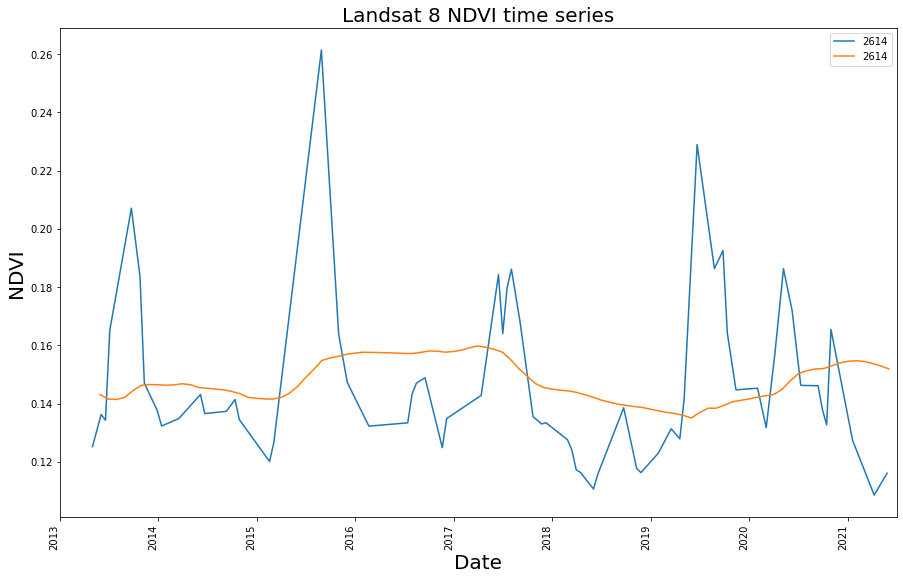

In [20]:
# Plot original and smoothed curves for one SuId on a single plot
fig, ax = plt.subplots(figsize=(15, 10))

suid = 2614

# Build list of unique seeding units for legend
seeding_units = [2614, 2614]

# Plot the original curve
landsat_8_time_series = landsat_8_time_series[(landsat_8_time_series['SuId'] == suid)]

landsat_8_time_series.reset_index().groupby(
    'SuId').plot(x='date', y='MeanNdvi', ax=ax)

# Plot the 2 year smoothed curve
landsat_8_time_series_rlmean = landsat_8_time_series_rlmean.reset_index()
landsat_8_time_series_rlmean = landsat_8_time_series_rlmean.set_index('date')
landsat_8_time_series_rlmean = landsat_8_time_series_rlmean[(landsat_8_time_series_rlmean['SuId'] == suid)]

landsat_8_time_series_rlmean.groupby(
    'SuId').plot(y='MeanNdvi', ax=ax, use_index=True)

plt.xlabel("Date", fontsize=20)
plt.ylabel("NDVI", fontsize=20)
plt.xlim([datetime.date(2013,1,1), datetime.date(2021,6,29)])

ax.set_title(
    "Landsat 8 NDVI time series", fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.legend(seeding_units)
plt.show()

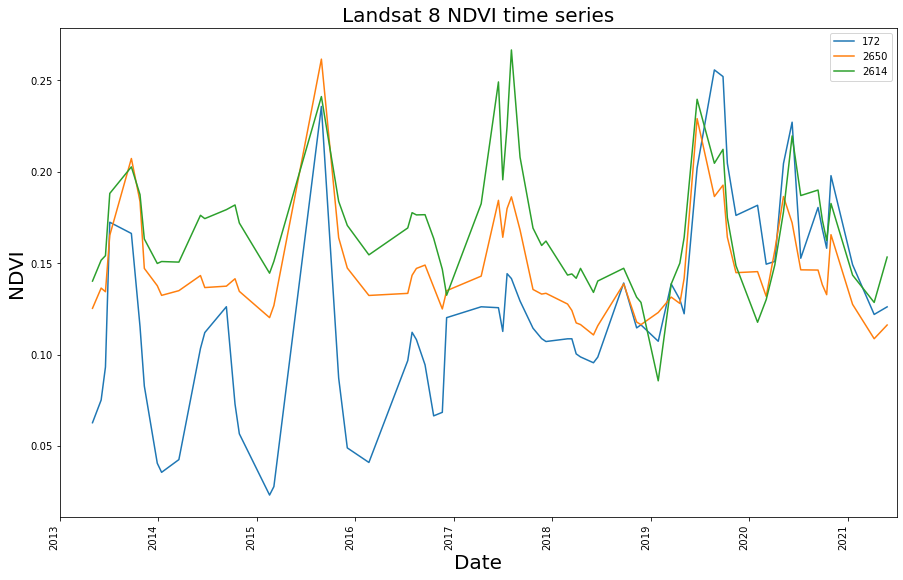

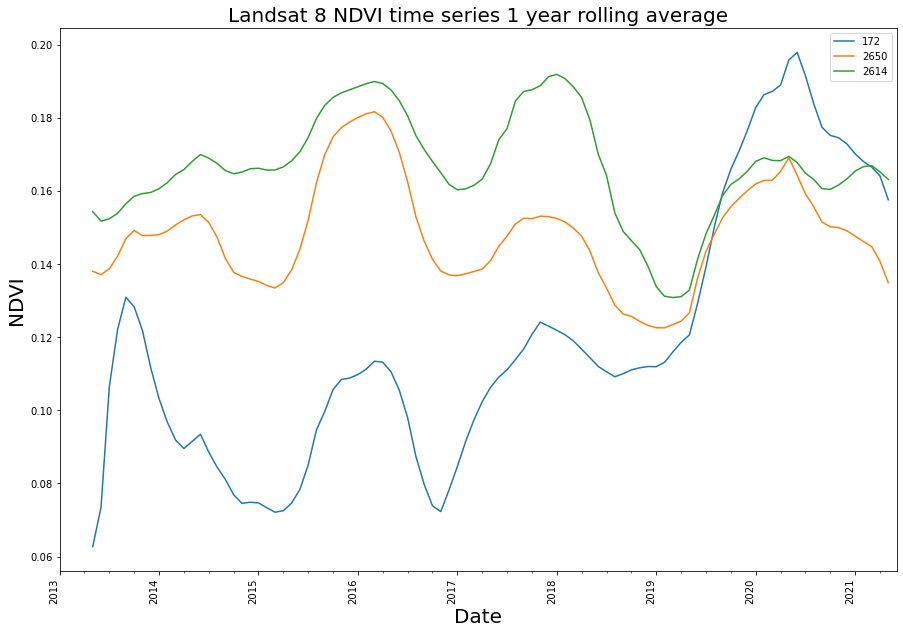

In [18]:
# Plot original and smoothed curves for a subset of SuId
fig, ax = plt.subplots(figsize=(15, 10))

# Build list of unique seeding units for legend
seeding_units = [172, 2650, 2614]

# Plot the original curve
landsat_8_time_series = landsat_8_time_series[(landsat_8_time_series['SuId'] == 172)
                                              | (landsat_8_time_series['SuId'] == 2650)
                                              | (landsat_8_time_series['SuId'] == 2614)]

landsat_8_time_series.reset_index().groupby(
    'SuId').plot(x='date', y='MeanNdvi', ax=ax)

plt.xlabel("Date", fontsize=20)
plt.ylabel("NDVI", fontsize=20)
plt.xlim([datetime.date(2013,1,1), datetime.date(2021,6,29)])

ax.set_title(
    "Landsat 8 NDVI time series", fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.legend(seeding_units)
plt.show()

# Plot the smoothed curve
# Plot original and smoothed curves for a subset of SuId
fig, ax = plt.subplots(figsize=(15, 10))

landsat_8_time_series_rlmean = landsat_8_time_series_rlmean.reset_index()
landsat_8_time_series_rlmean = landsat_8_time_series_rlmean.set_index('date')
landsat_8_time_series_rlmean = landsat_8_time_series_rlmean[(landsat_8_time_series_rlmean['SuId'] == 172)
                                                            | (landsat_8_time_series_rlmean['SuId'] == 2650)
                                                            | (landsat_8_time_series_rlmean['SuId'] == 2614)]

landsat_8_time_series_rlmean.groupby(
    'SuId').plot(y='MeanNdvi', ax=ax, use_index=True)

plt.xlabel("Date", fontsize=20)
plt.ylabel("NDVI", fontsize=20)
plt.xlim([datetime.date(2013,1,1), datetime.date(2021,6,29)])

ax.set_title(
    "Landsat 8 NDVI time series 1 year rolling average", fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.legend(seeding_units)
plt.show()

- Recent NDVI vs seeding year: do seeding units that have longer to establish exhibit higher NDVI?
- Slope of NDVI prior to and post seeding actions?
- What are recent slope values for the seeding units? Identify seeding units where slope is reducing?